# Model 2: Final Popularity Prediction

## Introduction

The final popularity of YouTube videos could influence their final performance, but how can we know what kind of these relations are? Will they be linear, or will they have some more interesting and intricate characteristics? Since we want to predict the videos' final successes by looking at their initial performance, we could first try to see the relation between the counts and Time; if they have a linear relation, this indicates that the initial and final counts also have linear relation. Then we take the counts of the first hour and last hour in the dataset and draw scatter plots, trying to predict their relations. From these plots, we could choose the most optimal model to predict teh video's final performance by looking at their initial performance.

In [1]:
# import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
import numpy as np

In [67]:
data = pd.read_csv('count_observation_upload.csv')

## Data Cleaning and Preparation

In [66]:
df=data.drop(['commentCount_diff','dislikeCount_diff','favoriteCount_diff','likeCount_diff',
              'viewCount_diff','favoriteCount'],axis=1)
#we drop favorite count since this data lacks these info(all 0 in the dataset)
#we drop other columns since we do not need these info for building our models.
df1=df.loc[df['videoId']=="FzG4uDgje3M"] # Channel name:Ultra Music
df1=df1.dropna()#drop the NaN entries
df1.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
0,0,0,FzG4uDgje3M,131330.0,411967.0,1993172.0,281321552.0,2018-05-07 18:00:00
1,1,1,FzG4uDgje3M,131410.0,412203.0,1994314.0,281468577.0,2018-05-07 19:00:00
2,2,2,FzG4uDgje3M,131562.0,412511.0,1995697.0,281915631.0,2018-05-07 20:00:00
3,3,3,FzG4uDgje3M,131690.0,412836.0,1997352.0,282044028.0,2018-05-07 21:00:00
4,4,4,FzG4uDgje3M,131857.0,413237.0,1999256.0,282380859.0,2018-05-07 22:00:00


## Prediction of initialCount and finalCount relations

### Data Visualization: viewCount and Time
We use scatter plot here to find the relation between viewCount and Time.

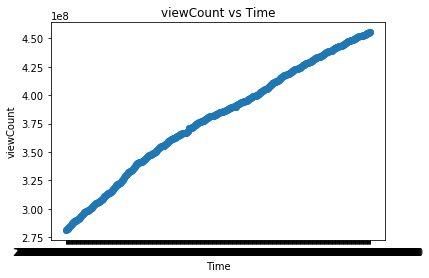

In [8]:
plt.scatter(df1['Time'],df1['viewCount'])
plt.title('viewCount vs Time')
plt.xlabel('Time')
plt.ylabel('viewCount')
plt.show()#we can see the viewcount and time forms a linear relationship.

### LinearRegression model: viewCount and Time
We train a linearRegression model to model the linear relation between viewCount and Time. Also, since the time in the dataset are strings and cannot be used to train our model, we could let the initial record time be 0, and since we have data recorded every hour, data of teh index column corresponding to each row could represent the time elapsed since the start of record.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df1[['viewCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9879031316328957

we get a pretty high score, which indecates our linear model of viewcount and time is pretty accurate. Thus, we could have the conclusion that if the initial viewcount is high, the final viewcount will also be high. We do the similar process for the rest counts and try to find teh relation between these counts and time.

### Data Visualization: commentCount and Time
We use scatter plot here to find the relation between commentCount and Time.

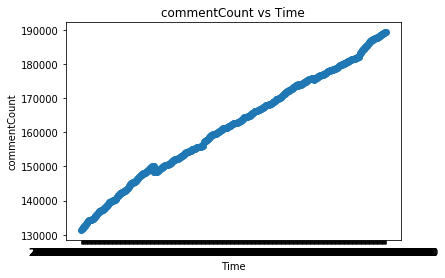

In [20]:
plt.scatter(df1['Time'],df1['commentCount'])
plt.title('commentCount vs Time')
plt.xlabel('Time')
plt.ylabel('commentCount')
plt.show()

We see that the relation between commentCount and Time is also mostly linear. Therefore we could choose LinearRegression model.

### LinearRegression model: commentCount and Time

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df1[['commentCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
#we could let the first record time be 0, and since we have data recorded every hr, 
#the index of the rows could represent teh time elapsed since the start of record.
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9957487072681469

### Data Visualization: likeCount and Time
We use scatter plot here to find the relation between likeCount and Time.

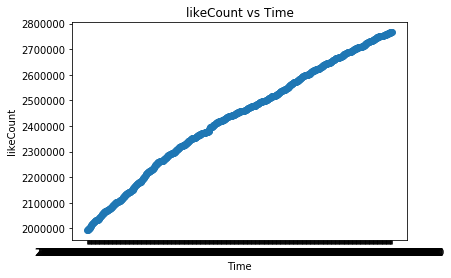

In [22]:
plt.scatter(df1['Time'],df1['likeCount'])
plt.title('likeCount vs Time')
plt.xlabel('Time')
plt.ylabel('likeCount')
plt.show()

### LinearRegression model: likeCount and Time

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df1[['likeCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9870919411503317

### Data Visualization: dislikeCount and Time

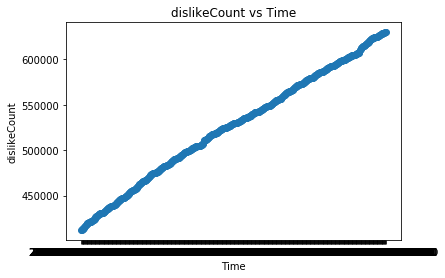

In [24]:
plt.scatter(df1['Time'],df1['dislikeCount'])
plt.title('dislikeCount vs Time')
plt.xlabel('Time')
plt.ylabel('dislikeCount')
plt.show()

### LinearRegression model: dislikeCount and Time

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df1[['dislikeCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9971574888627115

These count and time all have linear relation, and these linear relations indicate that the initial commentcount, viewcount, likecount, dislikecount, and their corresponding final values also have linear relations. Therefore we could make the prediction that we could build linear models to use the initial data to predict the possible final data, and therefore predict the final performance of videos by looking at their initial performance.
We will then actually plot the graphs and build teh models to check the correctness of our prediction;<br> 
the prediction we made above <strong><em>could have some potential problems </strong></em>since the scores for each model is too high, which seems not very realistic.

# Check Correctness of Preiction & Identify Possible Error-causing Problem
We noticed a possible cause for error in the models: the initial counts. If the initial counts are big, then <strong><em>the initial values could have too big an influence on the final values</strong></em> and therefore <strong><em>could significantly affect the relation and therefore affect the accuracy of the models</strong></em>. Therefore, we plot graphs and bulid models of the initial counts and the <strong><em>difference</strong></em> between the final counts and the initial counts. i.e., we plot graphs and build models of the initial counts and the value of (final_count - initial_count) to elimiate the error that could be caused by the big initial value.

## Data Cleaning and Preparation

We can see that we do have some null values in df3 and we need to fill them with mean value. 
We could choose mean because the dataset is relatively big, thus teh mean value could be a good representation of the possible NaN values. Then we change the value of counts in df3 to the difference betweeen the final counts and the initial counts to eliminate the influence of the initial values on the accuracy.

In [68]:
df2=df.loc[df['Time']=='2018-05-07 18:00:00']  #Initial Performance
df3=df.loc[df['Time']=='2018-06-05 16:00:00']  #Final Performance
print(pd.isnull(df2).sum() > 0)
print(pd.isnull(df3).sum() > 0)

df3['commentCount']=df3['commentCount'].fillna(df3['commentCount'].mean())
df3['dislikeCount']=df3['dislikeCount'].fillna(df3['dislikeCount'].mean())
df3['likeCount']=df3['likeCount'].fillna(df3['likeCount'].mean())
df3['viewCount']=df3['viewCount'].fillna(df3['viewCount'].mean())

#difference between initial count and final count
df3['commentCount']=df3['commentCount'].values-df2['commentCount'].values
df3['dislikeCount']=df3['dislikeCount'].values-df2['dislikeCount'].values
df3['likeCount']=df3['likeCount'].values-df2['likeCount'].values
df3['viewCount']=df3['viewCount'].values-df2['viewCount'].values
print(pd.isnull(df3).sum() > 0) #filled all teh NaN values successfully.

Unnamed: 0      False
index           False
videoId         False
commentCount    False
dislikeCount    False
likeCount       False
viewCount       False
Time            False
dtype: bool
Unnamed: 0      False
index           False
videoId         False
commentCount     True
dislikeCount     True
likeCount        True
viewCount        True
Time            False
dtype: bool


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

Unnamed: 0      False
index           False
videoId         False
commentCount    False
dislikeCount    False
likeCount       False
viewCount       False
Time            False
dtype: bool


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [69]:
df2.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
0,0,0,FzG4uDgje3M,131330.0,411967.0,1993172.0,281321552.0,2018-05-07 18:00:00
695,695,0,LOYAomlRbxI,13009.0,33188.0,706006.0,80762575.0,2018-05-07 18:00:00
1390,1390,0,Bm8rz-llMhE,14108.0,22212.0,647831.0,56259050.0,2018-05-07 18:00:00
2085,2085,0,pd7AMDMotyM,31895.0,41267.0,688754.0,53295716.0,2018-05-07 18:00:00
2780,2780,0,4kDklB6-69Q,69616.0,20403.0,1048729.0,46531812.0,2018-05-07 18:00:00


In [70]:
df3.head()#now the counts in the df3 is actually the difference between initial and final values.

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
694,694,694,FzG4uDgje3M,57945.0,217845.0,773068.0,174162471.0,2018-06-05 16:00:00
1389,1389,694,LOYAomlRbxI,5347.0,11916.0,165504.0,46932826.0,2018-06-05 16:00:00
2084,2084,694,Bm8rz-llMhE,1184.0,4892.0,101808.0,16873368.0,2018-06-05 16:00:00
2779,2779,694,pd7AMDMotyM,1914.0,4709.0,71034.0,16417437.0,2018-06-05 16:00:00
3474,3474,694,4kDklB6-69Q,10867.0,7536.0,252170.0,27965915.0,2018-06-05 16:00:00


Then we try to find teh relationship between their initial performance and final performance.
We expect this to be a linear relationship according to our pervious analysis, but we first need to 
visualize their relationship to confirm our prediction.
Since these data for the ith entries in df2 and df3 are of the same video, we do not need to alter teh 
position of rows of df2 and df3 since they are alerady matched.

### Data Visualization: initial commentCount and final_commentCount_diff

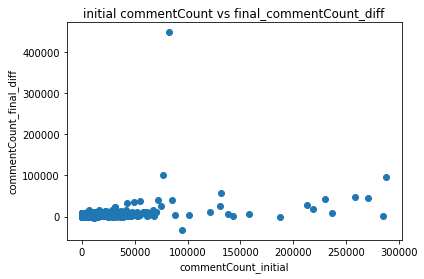

In [71]:
plt.scatter(df2['commentCount'],df3[''commentCount'])
plt.title('initial commentCount vs final_commentCount_diff')
plt.xlabel('commentCount_initial')
plt.ylabel('commentCount_final_diff')
plt.show()

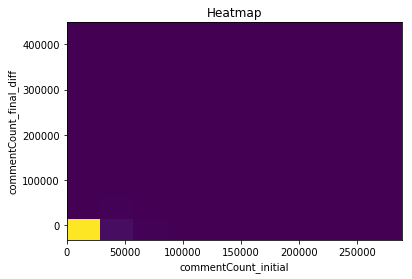

In [98]:
Z, hmx, hmy = np.histogram2d(df2['commentCount'],df3['commentCount'])

plt.title('Heatmap')
plt.xlabel('commentCount_initial')
plt.ylabel('commentCount_final_diff')
plt.pcolormesh(hmx,hmy,Z.T)

plt.show()

Our prediction about commentCount is <strong><em>not</strong></em> correct and this error could be caused by the big initial value of the commentCount. We could see that the initial comment count does not quite influence the final commentCount since from the plots we can see that the commentCount difference is nearly the same for all initial comment values, and the density is also nearly the same for all different values. According to the scatter plot, we could try to use both linearRegression model and ploy model to predict their relation, but we may <strong><em>not</strong></em> get a high score since these two counts are not actually tightly correlated.

### LinearRegression model: initial commentCount and final_commentCount_diff

In [83]:
x_train, x_test, y_train, y_test = train_test_split(df2[['commentCount']], df3[['commentCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.19337335880250875

### poly model: initial commentCount and final_commentCount_diff

In [84]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.20136061052150633

### Data Visualization: initial dislikeCount and final_dislikeCount_diff

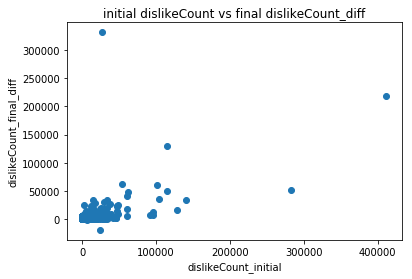

In [87]:
plt.scatter(df2['dislikeCount'],df3['dislikeCount'])
plt.title('initial dislikeCount vs final dislikeCount_diff')
plt.xlabel('dislikeCount_initial')
plt.ylabel('dislikeCount_final_diff')
plt.show()

### LinearRegression model: initial dislikeCount and final_dislikeCount_diff

In [88]:
x_train, x_test, y_train, y_test = train_test_split(df2[['dislikeCount']], df3[['dislikeCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5099655509613146

### poly model: initial dislikeCount and final_dislikeCount_diff

In [89]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.39714707566088786

we could see from the previous plot and analysis that the initial dislikeCount and dislikeCount_diff between the initial dislikeCount and final dislikeCouunt is more a linear relation; in other words, if there are more people dislike a video at the beginning when the video is posted, then more likely there are more people dislike this video after time.

### Data Visualization: initial likeCount and final_likeCount_diff

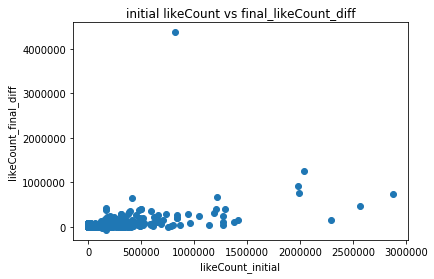

In [90]:
plt.scatter(df2['likeCount'],df3['likeCount'])
plt.title('initial likeCount vs final_likeCount_diff')
plt.xlabel('likeCount_initial')
plt.ylabel('likeCount_final_diff')
plt.show()

### LinearRegression model: initial likeCount and final_likeCount_diff

In [91]:
x_train, x_test, y_train, y_test = train_test_split(df2[['likeCount']], df3[['likeCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5198182179104062

### poly model: initial likeCount and final_likeCount_diff

In [92]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.4444005172307621

we could see from the previous plot and analysis that the initial likeCount and likeCount_diff between the initial likeCount and final likeCouunt is more a linear relation; in other words, if there are more people like a video at the beginning when the video is posted, then more likely there are more people like this video after time. This ralation is similar to teh initial dislike and final_dislike_diff relation, which is reasonable.

### Data Visualization: initial viewCount and final _viewCount_diff

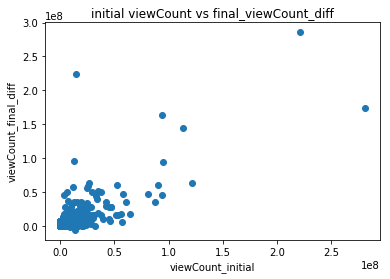

In [96]:
plt.scatter(df2['viewCount'],df3['viewCount'])
plt.title('initial viewCount vs final_viewCount_diff')
plt.xlabel('viewCount_initial')
plt.ylabel('viewCount_final_diff')
plt.show()

### LinearRegression model: initial viewCount and final_viewCount_diff

In [94]:
x_train, x_test, y_train, y_test = train_test_split(df2[['viewCount']], df3[['viewCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.764144432898527

### poly model: initial viewCount and final_viewCount_diff

In [95]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.8844861772127125

From the plot and abalysis above, we could see that the initial viewCount and the difference between the initial viewCount and final viewCount is more a ploynomial relation; this means that if there are more people view the video at the beginning when the video is posted, there are more likely to be much more people to view the video after time. It seems very reasonable for this to be a non-linear relationship since one people views the video usually means other people related to this people are more likely to see this video; it's like a tree, one parent see the video and therefore the "subtree/nodes" of the parent/root are more likely to view teh video.

## Interpretation of the result

Our result shows that the initial performance of a video is actually not necessary linearly correlated to its final performance. <br><br>
From the analysis above, we could see that the initial comment count do not influence the change of comment count after time and these two values are not actually tightly correlated. Therefore we could not say a video will get more comments because it gets many comments initially. <br><br>
For the like and dislike counts, these initial values seems to have a more linear relation with the change of like/dislkie counts overtime, which means that we could predict if a video has more likecount at the beginning, it is more likely to have proportionally more like/dislike after time.<br><br>
For the viewCounts, these initial values seems to have a more polynomial relation with the change of viewCounts overtime. Therefore, we could predict that if a video has more viewCounts initially, it is more likely to have a lot more viewCounts after time. In other words, if YouTubers wants to make their videos popular after time, it is better for them to try to attract as many people as they can to view their video at the very beginning when the video is released since this will significantly improve the final viewCounts.<br><br>
Therefore, we could predict the final performance of YouTube videos by looking at their initial performance using our models; this is veru useful for the YouTubers since they could know whether or not their video will be very popular after some time and what to do to imporve the corresponding counts, therefore they could improve their possible incomes. We could also see that it is very important to advertise the video at the beginning when it is released since this could improve both the final likeCount and final viewCount.